In [1]:
#import required packages
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas_gbq
import plotly.graph_objs as go
import plotly as ply
import chart_studio.plotly as py
import dash
import dash_html_components as html
import dash_core_components as dcc
from dash.dependencies import Input, Output
from datetime import datetime as dt, timedelta

In [129]:
def service_options():
    service_sql = """SELECT DISTINCT SERVICE_TYPE value FROM
    `bcx-insights.telkom_customerexperience.customerdata_20190902_00_anon`
    WHERE SERVICE_TYPE is not NULL AND CUSTOMER_NO_ANON in
    (SELECT DISTINCT ACCOUNT_NO_ANON FROM
    `bcx-insights.telkom_customerexperience.orders_20190903_00_anon`)"""

    options = pd.io.gbq.read_gbq(service_sql,
                                    project_id='bcx-insights',
                                    dialect='standard').fillna('N/A')

    options['label'] = options['value'].str.title()

    #options = [{'label': x['label'],
    #            'value': x['value']} for _, x in options.iterrows()]

    return options['label']


In [130]:
service_options()

0     Fixed
1    Mobile
Name: label, dtype: object

In [139]:
def customer_type():
    type_sql = """SELECT DISTINCT CUSTOMER_TYPE_DESC value FROM
    `bcx-insights.telkom_customerexperience.customerdata_20190902_00_anon`
    WHERE CUSTOMER_TYPE_DESC is not NULL AND CUSTOMER_NO_ANON in
    (SELECT DISTINCT ACCOUNT_NO_ANON FROM
    `bcx-insights.telkom_customerexperience.orders_20190903_00_anon`)
    ORDER BY CUSTOMER_TYPE_DESC"""

    types = pd.io.gbq.read_gbq(type_sql,
                                    project_id='bcx-insights',
                                    dialect='standard').fillna('N/A')

    types['label'] = types['value'].str.title()

    types = [{'label': x['label'],
                'value': x['value']} for _, x in types.iterrows()]

    return types

In [140]:
customer_type()[:]

[{'label': 'Bcx Provincial Government', 'value': 'BCX Provincial Government'},
 {'label': 'Budget Control', 'value': 'Budget Control'},
 {'label': 'Bus. Default', 'value': 'Bus. Default'},
 {'label': 'Central', 'value': 'Central'},
 {'label': 'Central Sales Gp L Fs', 'value': 'Central Sales GP L FS'},
 {'label': 'Combined Service Use', 'value': 'Combined Service Use'},
 {'label': 'Direct Sales Force Midmarket',
  'value': 'Direct Sales Force Midmarket'},
 {'label': 'East Coast Region', 'value': 'East Coast Region'},
 {'label': 'East Sales Kzn Ec Mp', 'value': 'East Sales KZN EC MP'},
 {'label': 'Economic And Social Cluster',
  'value': 'Economic and Social Cluster'},
 {'label': 'Financial', 'value': 'Financial'},
 {'label': 'Gauteng Region', 'value': 'Gauteng Region'},
 {'label': 'Gauteng Sales', 'value': 'Gauteng Sales'},
 {'label': 'Internal Consumption', 'value': 'Internal Consumption'},
 {'label': 'Large', 'value': 'Large'},
 {'label': 'Medical Practitioner', 'value': 'Medical Prac

In [6]:
def has_dispute():
    return [{'label': 'Either', 'value': 'Either'},
            {'label': 'Yes', 'value': 'Yes'},
            {'label': 'No', 'value': 'No'}]

In [7]:
has_dispute()

[{'label': 'Either', 'value': 'Either'},
 {'label': 'Yes', 'value': 'Yes'},
 {'label': 'No', 'value': 'No'}]

In [8]:
def has_fault():
    return [{'label': 'Either', 'value': 'Either'},
            {'label': 'Yes', 'value': 'Yes'},
            {'label': 'No', 'value': 'No'}]

In [9]:
has_fault()

[{'label': 'Either', 'value': 'Either'},
 {'label': 'Yes', 'value': 'Yes'},
 {'label': 'No', 'value': 'No'}]

In [10]:
def time_measure():
    return [{'label': 'days', 'value': 'days'},
            {'label': 'hours', 'value': 'hours'},
            {'label': 'minutes', 'value': 'minutes'},
            {'label': 'seconds', 'value': 'seconds'}]

In [11]:
time_measure()

[{'label': 'days', 'value': 'days'},
 {'label': 'hours', 'value': 'hours'},
 {'label': 'minutes', 'value': 'minutes'},
 {'label': 'seconds', 'value': 'seconds'}]

In [12]:
def deal_desc():
    type_sql = r"""SELECT distinct DEAL_DESC,
    TRIM(REGEXP_REPLACE(DEAL_DESC, '(\\(|\\)|\\bR\\d*|\\d*(GB|MB|@|Mbps)|\\s\\d|\\+|\\b\\d\\b)', '')) DEAL
    FROM `bcx-insights.telkom_customerexperience.orders_20190926_00_anon`"""

    df = pd.io.gbq.read_gbq(type_sql,
                            project_id='bcx-insights',
                            dialect='standard').dropna().drop_duplicates()


    df['DEAL']  = df['DEAL'].str.split(' on')

    options = []
    for r in df['DEAL'] :
      options.append(r[-1].strip())

    df['DEAL'] = options
    deal_map = df.groupby('DEAL')['DEAL_DESC'].apply(list)
    deal_map = deal_map.to_dict()

    options = [{'label': k, 'value': str(v)} for k, v in deal_map.items()]

    return options

In [13]:
deal_desc()[:5]

[{'label': 'FreeMe TVC1607187', 'value': "['FreeMe 1GB TVC1607187']"},
 {'label': 'SmartInternet Unlimited Deal',
  'value': "['SmartInternet Unlimited Deal']"},
 {'label': 'BizTalk SIP000', 'value': "['BizTalk SIP 1000']"},
 {'label': 'Basic ComboDeal11 Killer Deal',
  'value': "['Basic ComboDeal 111 (Killer Deal 2)']"},
 {'label': 'Smart Contract   x4 Months',
  'value': "['Apple iPhone 5 32GB + R200 SIM & Connection Fee Charged on Smart Contract 3 @R518 + 250MB x 24 Months', 'Apple iPhone 5 16GB + R200 SIM & Connection Fee Charged on Smart Contract 3 @R458 + 250MB x 24 Months', 'Apple iPhone 5 16GB + R200 SIM & Connection Fee Charged on Smart Contract 1 @R408 + 250MB x 24 Months', 'Apple iPhone 5 32GB + R200 SIM & Connection Fee Charged on Smart Contract 1 @R458 + 250MB x 24 Months', 'Apple iPhone 5 64GB + R200 SIM & Connection Fee Charged on Smart Contract 3 @R588 + 500MB x 24 Months']"}]

In [14]:
def action_status():
    type_sql = r"""SELECT distinct ACTION_STATUS_DESC
    FROM `bcx-insights.telkom_customerexperience.orders_20190926_00_anon`
    ORDER BY ACTION_STATUS_DESC"""

    df = pd.io.gbq.read_gbq(type_sql,
                            project_id='bcx-insights',
                            dialect='standard').dropna().drop_duplicates()

    df = df['ACTION_STATUS_DESC'].tolist()

    options = [{'label': v, 'value': v} for v in df]

    return options

In [15]:
action_status()

[{'label': 'Amended', 'value': 'Amended'},
 {'label': 'Being Amended', 'value': 'Being Amended'},
 {'label': 'Cancelled', 'value': 'Cancelled'},
 {'label': 'Completion', 'value': 'Completion'},
 {'label': 'Delivery', 'value': 'Delivery'},
 {'label': 'Discontinued', 'value': 'Discontinued'},
 {'label': 'Done', 'value': 'Done'},
 {'label': 'Initial', 'value': 'Initial'},
 {'label': 'Negotiation', 'value': 'Negotiation'},
 {'label': 'To Be Cancelled', 'value': 'To Be Cancelled'}]

In [16]:
def action_type():
    type_sql = r"""SELECT distinct ACTION_TYPE_DESC
    FROM `bcx-insights.telkom_customerexperience.orders_20190926_00_anon`
    order by ACTION_TYPE_DESC"""

    df = pd.io.gbq.read_gbq(type_sql,
                            project_id='bcx-insights',
                            dialect='standard')

    df['ACTION_TYPE_DESC'] = df['ACTION_TYPE_DESC'].str.title().drop_duplicates()

    df = df['ACTION_TYPE_DESC'].dropna().tolist()

    options = [{'label': v, 'value': v} for v in df]

    return options

if __name__ == '__main__':
    print(service_options())

[{'value': 'FIXED', 'label': 'Fixed'}, {'value': 'MOBILE', 'label': 'Mobile'}]


In [17]:
action_type()

[{'label': 'Automatic Update Billing', 'value': 'Automatic Update Billing'},
 {'label': 'Cease', 'value': 'Cease'},
 {'label': 'Cease Part Of Migrate', 'value': 'Cease Part Of Migrate'},
 {'label': 'Cease Part Of Move', 'value': 'Cease Part Of Move'},
 {'label': 'Cease Part Of Replace Offer',
  'value': 'Cease Part Of Replace Offer'},
 {'label': 'Cease Due To Collection', 'value': 'Cease Due To Collection'},
 {'label': 'Change', 'value': 'Change'},
 {'label': 'Change - Dispatchable', 'value': 'Change - Dispatchable'},
 {'label': 'Change - No Dispatch', 'value': 'Change - No Dispatch'},
 {'label': 'Change - T&M Dispatch', 'value': 'Change - T&M Dispatch'},
 {'label': 'Change Ban To Ban', 'value': 'Change Ban To Ban'},
 {'label': 'Change Network', 'value': 'Change Network'},
 {'label': 'Change Ownership', 'value': 'Change Ownership'},
 {'label': 'Change Part Of Replace Offer',
  'value': 'Change Part Of Replace Offer'},
 {'label': 'Change Sn', 'value': 'Change Sn'},
 {'label': 'Collectio

In [18]:
def build_query(iterable, field_name):
    if iterable is not None:
        if len(iterable) > 0:
            iterable = ','.join(["'" + s + "'" for s in iterable])
            iterable = 'and {} IN ({})'.format(field_name, iterable)
            return iterable
        else:
            return ''
    else:
        return ''

In [19]:
def dispute_query(dispute_val, start_date_val, end_date_val):
    sql = """
        (SELECT DISTINCT ACCOUNT_NO_ANON dispute_id FROM
        `bcx-insights.telkom_customerexperience.disputes_20190903_00_anon`
        WHERE RESOLUTION_DATE BETWEEN '{}' AND '{}') as disputes
        on orders.ACCOUNT_NO_ANON = disputes.dispute_id""".format(start_date_val, end_date_val)

    if dispute_val == 'Yes':
        join_type = 'JOIN '
        return join_type + sql, ''
    elif dispute_val == 'No':
        join_type = 'LEFT JOIN '

        return join_type + sql, "AND dispute_id is Null"
    else:
        return '', ''

In [20]:
dispute_query(None, None, None)

('', '')

In [21]:
def fault_query(fault_val, start_date_val, end_date_val):
    sql = """
        (SELECT DISTINCT SERVICE_KEY_ANON fault_id FROM
        `bcx-insights.telkom_customerexperience.faults_20190903_00_anon`
        WHERE DATDRGT BETWEEN '{}' AND '{}') as faults
        on orders.ACCOUNT_NO_ANON = faults.fault_id""".format(start_date_val, end_date_val)

    if fault_val == 'Yes':
        join_type = 'JOIN '
        return join_type + sql, ''
    elif fault_val == 'No':
        join_type = 'LEFT JOIN '

        return join_type + sql, "AND fault_id is Null"
    else:
        return '', ''

In [22]:
fault_query(None, None, None)

('', '')

In [23]:
def between_date_query(start_date_val, end_date_val):
    date_range = """AND orders.ORDER_CREATION_DATE BETWEEN '{}' AND '{}'""".format(start_date_val, end_date_val)

    return "{}".format(date_range)

## Calling SQL

In [24]:
def sql_query_call(service_type, 
                   customer_type, 
                   deal_desc, 
                   action_status,
                   start_date_val, 
                   end_date_val, 
                   dispute_val,
                   fault_val,
                   #action_filter,
                   #min_hours, 
                   #has_action
                  ):
    
    service_type = build_query(service_type, 'SERVICE_TYPE')
    customer_type = build_query(customer_type, 'CUSTOMER_TYPE_DESC')
    deal_desc = build_query(deal_desc, 'DEAL_DESC')                           #add add hoc deal
    #deal_type = "'TBiz BB Capped Advanced'"
    #has_action = includes_action(has_action, start_date_val, end_date_val)

    dispute_join, dispute_where = dispute_query(dispute_val, start_date_val, end_date_val)
    fault_join, fault_where = fault_query(fault_val, start_date_val, end_date_val)
    #hours_sql_field, hours_where = build_min_hours(min_hours)
    #action_status_subquery, action_status_where = last_status_or_action_query(action_status, action_filter)

    if start_date_val is not None and end_date_val is not None:
        date_range = between_date_query(start_date_val, end_date_val)
    else:
        date_range = ''

        
    query = """
    SELECT *
    FROM `bcx-insights.telkom_customerexperience.orders_20190926_00_anon` as orders
    LEFT JOIN
    (SELECT DISTINCT CUSTOMER_NO_ANON, SERVICE_TYPE, CUSTOMER_TYPE_DESC FROM
    `bcx-insights.telkom_customerexperience.customerdata_20190902_00_anon`) as custs
    ON custs.CUSTOMER_NO_ANON = orders.ACCOUNT_NO_ANON
    WHERE 1=1
    --AND orders.SOURCE = "F"
    {}
    {}
    {}
    {}
    {}
    {}
    ORDER BY ORDER_CREATION_DATE, ACTION_CREATION_DATE, ORDER_ID_ANON
    """.format(deal_desc,customer_type, service_type, dispute_where, fault_where, date_range)
    
    return query

In [25]:
query_called = sql_query_call(None,                      # service type ['FIXED']
                None,                                    # customer type ['Small']
                ['TBiz BB Capped Advanced'],                  # deal type ['TBiz BB Capped Advanced']
                None,                        #not used        # action status ['Done']
                None,    # start date
                None,                            # end date
                None,                                         # has dispute
                None                                          # has fault
                )

In [26]:
print(query_called)


    SELECT *
    FROM `bcx-insights.telkom_customerexperience.orders_20190926_00_anon` as orders
    LEFT JOIN
    (SELECT DISTINCT CUSTOMER_NO_ANON, SERVICE_TYPE, CUSTOMER_TYPE_DESC FROM
    `bcx-insights.telkom_customerexperience.customerdata_20190902_00_anon`) as custs
    ON custs.CUSTOMER_NO_ANON = orders.ACCOUNT_NO_ANON
    WHERE 1=1
    AND orders.SOURCE = "F"
    and DEAL_DESC IN ('TBiz BB Capped Advanced')
    
    
    
    
    
    ORDER BY ORDER_CREATION_DATE, ACTION_CREATION_DATE, ORDER_ID_ANON
    


## Manipulating dataframe

In [27]:
#create order dataframe
orders_df = pd.read_gbq(query_called,
                project_id = 'bcx-insights',
                dialect = 'standard')

In [28]:
orders_df.head()

,ORDER_STATUS_DESC,ORDER_CREATION_DATE,ACTION_STATUS_DESC,ACTION_TYPE,ACTION_TYPE_DESC,ACTION_CREATION_DATE,ORIGINAL_SALES_CHANNEL_DESC,CURRENT_SALES_CHANNEL_DESC,DEAL_DESC,PROV_DATE,CLOSE_DATE,OPEN_CLOSE_INDIC,SOURCE,ORDER_ID_ANON,ACCOUNT_NO_ANON,MSISDN_ANON,ORDER_ACTION_ID_ANON,CUSTOMER_NO_ANON,SERVICE_TYPE,CUSTOMER_TYPE_DESC
0,Done,2018-09-19 00:01:40+00:00,Done,CR,Resume from Suspension due to Collection,2018-09-19 00:00:34+00:00,Call Center,Call Center,TBiz BB Capped Advanced,2018-09-19 23:59:59+00:00,2018-09-19 02:02:36+00:00,C,F,8014743664010143874,4880988462641041588,8267334465643049670,-22945164240823800,NaN,None,None
1,Done,2018-09-19 00:01:40+00:00,Done,CR,Resume from Suspension due to Collection,2018-09-19 00:00:34+00:00,Call Center,Call Center,TBiz BB Capped Advanced,2018-09-19 23:59:59+00:00,2018-09-19 02:02:36+00:00,C,F,8014743664010143874,4880988462641041588,8267334465643049670,-22945164240823800,NaN,None,None
2,Done,2018-09-19 00:08:19+00:00,Done,CR,Resume from Suspension due to Collection,2018-09-19 00:02:30+00:00,Call Center,Call Center,TBiz BB Capped Advanced,2018-09-19 23:59:59+00:00,2018-09-19 02:02:46+00:00,C,F,4896610020755115874,4880988462641041588,5883010122451860359,6206333873489587611,NaN,None,None
3,Done,2018-09-19 00:08:19+00:00,Done,CR,Resume from Suspension due to Collection,2018-09-19 00:02:30+00:00,Call Center,Call Center,TBiz BB Capped Advanced,2018-09-19 23:59:59+00:00,2018-09-19 02:02:46+00:00,C,F,4896610020755115874,4880988462641041588,5883010122451860359,6206333873489587611,NaN,None,None
4,Done,2018-09-19 00:08:22+00:00,Done,CR,Resume from Suspension due to Collection,2018-09-19 00:08:04+00:00,Call Center,Call Center,TBiz BB Capped Advanced,2018-09-19 23:59:59+00:00,2018-09-19 02:03:30+00:00,C,F,-7402119597778060068,-7190704940419402037,6881390640784013810,1589287855847731834,NaN,None,None


In [29]:
len(orders_df)

7892

In [30]:
orders_df = orders_df.drop_duplicates()

In [31]:
len(orders_df)

6851

In [32]:
orders_df.head()

,ORDER_STATUS_DESC,ORDER_CREATION_DATE,ACTION_STATUS_DESC,ACTION_TYPE,ACTION_TYPE_DESC,ACTION_CREATION_DATE,ORIGINAL_SALES_CHANNEL_DESC,CURRENT_SALES_CHANNEL_DESC,DEAL_DESC,PROV_DATE,CLOSE_DATE,OPEN_CLOSE_INDIC,SOURCE,ORDER_ID_ANON,ACCOUNT_NO_ANON,MSISDN_ANON,ORDER_ACTION_ID_ANON,CUSTOMER_NO_ANON,SERVICE_TYPE,CUSTOMER_TYPE_DESC
0,Done,2018-09-19 00:01:40+00:00,Done,CR,Resume from Suspension due to Collection,2018-09-19 00:00:34+00:00,Call Center,Call Center,TBiz BB Capped Advanced,2018-09-19 23:59:59+00:00,2018-09-19 02:02:36+00:00,C,F,8014743664010143874,4880988462641041588,8267334465643049670,-22945164240823800,NaN,None,None
2,Done,2018-09-19 00:08:19+00:00,Done,CR,Resume from Suspension due to Collection,2018-09-19 00:02:30+00:00,Call Center,Call Center,TBiz BB Capped Advanced,2018-09-19 23:59:59+00:00,2018-09-19 02:02:46+00:00,C,F,4896610020755115874,4880988462641041588,5883010122451860359,6206333873489587611,NaN,None,None
4,Done,2018-09-19 00:08:22+00:00,Done,CR,Resume from Suspension due to Collection,2018-09-19 00:08:04+00:00,Call Center,Call Center,TBiz BB Capped Advanced,2018-09-19 23:59:59+00:00,2018-09-19 02:03:30+00:00,C,F,-7402119597778060068,-7190704940419402037,6881390640784013810,1589287855847731834,NaN,None,None
6,Done,2018-09-19 00:11:18+00:00,Done,CR,Resume from Suspension due to Collection,2018-09-19 00:11:16+00:00,Call Center,Call Center,TBiz BB Capped Advanced,2018-09-19 23:59:59+00:00,2018-09-19 02:35:04+00:00,C,F,-891254573908734095,-1202927280942112478,-7917274003366893655,7874500299927321830,NaN,None,None
8,Done,2018-09-19 00:11:26+00:00,Done,CR,Resume from Suspension due to Collection,2018-09-19 00:11:25+00:00,Call Center,Call Center,TBiz BB Capped Advanced,2018-09-19 23:59:59+00:00,2018-09-19 02:08:45+00:00,C,F,-4980229336441433325,-1202927280942112478,-3858268071889160291,-6140598406575839500,NaN,None,None


In [33]:
orders_df['MSISDN_ANON'] = orders_df['MSISDN_ANON'].astype(str)

In [34]:
orders_df['ORDER_ID_ANON'] = orders_df['ORDER_ID_ANON'].astype(str)

In [35]:
unique_col = 'combo'

In [36]:
orders_df[unique_col] = orders_df['MSISDN_ANON']+'_'+orders_df['ORDER_ID_ANON']

In [37]:
orders_df['stage'] = orders_df.groupby(unique_col).cumcount()+1

In [38]:
final_stage = orders_df[[unique_col,'stage', 'ORDER_CREATION_DATE']].groupby(unique_col).agg({'stage': 'max', 'ORDER_CREATION_DATE': ['min', 'max']})

In [39]:
final_stage.head()

ORDER_CREATION_DATE  \
                                                                min   
combo                                                                 
-1002689210467033689_-4097911263059863394 2019-06-10 13:55:28+00:00   
-1002689210467033689_-4708518482210045078 2019-06-10 13:44:49+00:00   
-1002689210467033689_-6805338612372424491 2019-08-29 06:26:56+00:00   
-1002689210467033689_4694949585886651643  2019-07-16 02:47:00+00:00   
-1002689210467033689_6330235094427327840  2019-08-29 10:21:36+00:00   

                                                                    stage  
                                                                max   max  
combo                                                                      
-1002689210467033689_-4097911263059863394 2019-07-02 10:07:27+00:00     2  
-1002689210467033689_-4708518482210045078 2019-06-10 13:44:49+00:00     1  
-1002689210467033689_-6805338612372424491 2019-08-29 06:26:56+00:00     1  
-1002689210467033689_4694949585886651643  2019-07-16 02:47:00+00:00     1  
-1002689210467033689_6330235094427327840  2019-08-29 10:21:36+00:00     1

In [40]:
final_stage.columns = ["_".join(pair) for pair in final_stage.columns]

In [41]:
final_stage.rename(columns={'stage_max':'final_stage', 'ORDER_CREATION_DATE_min':'first_date', 'ORDER_CREATION_DATE_max':'last_date'}, inplace=True)

In [42]:
final_stage.head()

,first_date,last_date,final_stage
combo,,,
-1002689210467033689_-4097911263059863394,2019-06-10 13:55:28+00:00,2019-07-02 10:07:27+00:00,2
-1002689210467033689_-4708518482210045078,2019-06-10 13:44:49+00:00,2019-06-10 13:44:49+00:00,1
-1002689210467033689_-6805338612372424491,2019-08-29 06:26:56+00:00,2019-08-29 06:26:56+00:00,1
-1002689210467033689_4694949585886651643,2019-07-16 02:47:00+00:00,2019-07-16 02:47:00+00:00,1
-1002689210467033689_6330235094427327840,2019-08-29 10:21:36+00:00,2019-08-29 10:21:36+00:00,1


In [43]:
#final_stage['total_journey_length'] = final_stage['last_date'] - final_stage['first_date']

In [44]:
final_stage.head()

,first_date,last_date,final_stage
combo,,,
-1002689210467033689_-4097911263059863394,2019-06-10 13:55:28+00:00,2019-07-02 10:07:27+00:00,2
-1002689210467033689_-4708518482210045078,2019-06-10 13:44:49+00:00,2019-06-10 13:44:49+00:00,1
-1002689210467033689_-6805338612372424491,2019-08-29 06:26:56+00:00,2019-08-29 06:26:56+00:00,1
-1002689210467033689_4694949585886651643,2019-07-16 02:47:00+00:00,2019-07-16 02:47:00+00:00,1
-1002689210467033689_6330235094427327840,2019-08-29 10:21:36+00:00,2019-08-29 10:21:36+00:00,1


In [45]:
orders_df = pd.merge(orders_df, final_stage, on=unique_col, how='outer')

In [46]:
orders_df.head()

,ORDER_STATUS_DESC,ORDER_CREATION_DATE,ACTION_STATUS_DESC,ACTION_TYPE,ACTION_TYPE_DESC,ACTION_CREATION_DATE,ORIGINAL_SALES_CHANNEL_DESC,CURRENT_SALES_CHANNEL_DESC,DEAL_DESC,PROV_DATE,...,MSISDN_ANON,ORDER_ACTION_ID_ANON,CUSTOMER_NO_ANON,SERVICE_TYPE,CUSTOMER_TYPE_DESC,combo,stage,first_date,last_date,final_stage
0,Done,2018-09-19 00:01:40+00:00,Done,CR,Resume from Suspension due to Collection,2018-09-19 00:00:34+00:00,Call Center,Call Center,TBiz BB Capped Advanced,2018-09-19 23:59:59+00:00,...,8267334465643049670,-22945164240823800,NaN,None,None,8267334465643049670_8014743664010143874,1,2018-09-19 00:01:40+00:00,2018-09-19 00:01:40+00:00,1
1,Done,2018-09-19 00:08:19+00:00,Done,CR,Resume from Suspension due to Collection,2018-09-19 00:02:30+00:00,Call Center,Call Center,TBiz BB Capped Advanced,2018-09-19 23:59:59+00:00,...,5883010122451860359,6206333873489587611,NaN,None,None,5883010122451860359_4896610020755115874,1,2018-09-19 00:08:19+00:00,2018-09-19 00:08:19+00:00,1
2,Done,2018-09-19 00:08:22+00:00,Done,CR,Resume from Suspension due to Collection,2018-09-19 00:08:04+00:00,Call Center,Call Center,TBiz BB Capped Advanced,2018-09-19 23:59:59+00:00,...,6881390640784013810,1589287855847731834,NaN,None,None,6881390640784013810_-7402119597778060068,1,2018-09-19 00:08:22+00:00,2018-09-19 00:08:22+00:00,1
3,Done,2018-09-19 00:11:18+00:00,Done,CR,Resume from Suspension due to Collection,2018-09-19 00:11:16+00:00,Call Center,Call Center,TBiz BB Capped Advanced,2018-09-19 23:59:59+00:00,...,-7917274003366893655,7874500299927321830,NaN,None,None,-7917274003366893655_-891254573908734095,1,2018-09-19 00:11:18+00:00,2018-09-19 00:11:18+00:00,1
4,Done,2018-09-19 00:11:26+00:00,Done,CR,Resume from Suspension due to Collection,2018-09-19 00:11:25+00:00,Call Center,Call Center,TBiz BB Capped Advanced,2018-09-19 23:59:59+00:00,...,-3858268071889160291,-6140598406575839500,NaN,None,None,-3858268071889160291_-4980229336441433325,1,2018-09-19 00:11:26+00:00,2018-09-19 00:11:26+00:00,1


In [47]:
orders_df['accumulated_time'] = orders_df['ORDER_CREATION_DATE']-orders_df['first_date'] 

In [48]:
orders_df['total_journey_time'] = orders_df['last_date']-orders_df['first_date'] 

In [49]:
orders_df[orders_df['final_stage']==2].head()

,ORDER_STATUS_DESC,ORDER_CREATION_DATE,ACTION_STATUS_DESC,ACTION_TYPE,ACTION_TYPE_DESC,ACTION_CREATION_DATE,ORIGINAL_SALES_CHANNEL_DESC,CURRENT_SALES_CHANNEL_DESC,DEAL_DESC,PROV_DATE,...,CUSTOMER_NO_ANON,SERVICE_TYPE,CUSTOMER_TYPE_DESC,combo,stage,first_date,last_date,final_stage,accumulated_time,total_journey_time
52,Cancelled,2018-09-19 10:20:39+00:00,Cancelled,CI,Cease Part Of Migrate,2018-09-19 00:00:00+00:00,Call Center,Call Center,TBiz BB Capped Advanced,1950-01-01 00:00:00+00:00,...,NaN,None,None,-163301983679457663_-798146561363310271,1,2018-09-19 10:20:39+00:00,2018-09-19 10:41:39+00:00,2,0 days 00:00:00,0 days 00:21:00
53,Done,2018-09-19 10:41:39+00:00,Done,CI,Cease Part Of Migrate,2018-09-19 00:00:00+00:00,Call Center,Call Center,TBiz BB Capped Advanced,2018-09-19 12:41:55+00:00,...,NaN,None,None,-163301983679457663_-798146561363310271,2,2018-09-19 10:20:39+00:00,2018-09-19 10:41:39+00:00,2,0 days 00:21:00,0 days 00:21:00
147,Cancelled,2018-09-21 15:00:41+00:00,Cancelled,CI,Cease Part Of Migrate,2018-09-21 00:00:00+00:00,WNS SMBS Outbound,WNS SMBS Outbound,TBiz BB Capped Advanced,1950-01-01 00:00:00+00:00,...,NaN,None,None,-5476603457303044367_1927791018406881593,1,2018-09-21 15:00:41+00:00,2018-09-25 12:46:42+00:00,2,0 days 00:00:00,3 days 21:46:01
148,Done,2018-09-25 12:46:42+00:00,Done,CI,Cease Part Of Migrate,2018-09-21 00:00:00+00:00,WNS SMBS Outbound,WNS SMBS Outbound,TBiz BB Capped Advanced,2018-09-25 13:18:32+00:00,...,NaN,None,None,-5476603457303044367_1927791018406881593,2,2018-09-21 15:00:41+00:00,2018-09-25 12:46:42+00:00,2,3 days 21:46:01,3 days 21:46:01
160,Done,2018-09-22 23:09:25+00:00,Done,CR,Resume from Suspension due to Collection,2018-09-22 23:09:25+00:00,Call Center,Call Center,TBiz BB Capped Advanced,2018-09-22 23:59:59+00:00,...,3.158067e+18,MOBILE,Bus. Default,1753552838791919187_8148727144105914151,1,2018-09-22 23:09:25+00:00,2018-09-22 23:09:25+00:00,2,0 days 00:00:00,0 days 00:00:00


In [50]:
orders_df['accumulated_time'] = orders_df['accumulated_time'].dt.total_seconds()

In [51]:
orders_df['total_journey_time'] = orders_df['total_journey_time'].dt.total_seconds()

In [52]:
orders_df[orders_df['final_stage']==2].head()

,ORDER_STATUS_DESC,ORDER_CREATION_DATE,ACTION_STATUS_DESC,ACTION_TYPE,ACTION_TYPE_DESC,ACTION_CREATION_DATE,ORIGINAL_SALES_CHANNEL_DESC,CURRENT_SALES_CHANNEL_DESC,DEAL_DESC,PROV_DATE,...,CUSTOMER_NO_ANON,SERVICE_TYPE,CUSTOMER_TYPE_DESC,combo,stage,first_date,last_date,final_stage,accumulated_time,total_journey_time
52,Cancelled,2018-09-19 10:20:39+00:00,Cancelled,CI,Cease Part Of Migrate,2018-09-19 00:00:00+00:00,Call Center,Call Center,TBiz BB Capped Advanced,1950-01-01 00:00:00+00:00,...,NaN,None,None,-163301983679457663_-798146561363310271,1,2018-09-19 10:20:39+00:00,2018-09-19 10:41:39+00:00,2,0.0,1260.0
53,Done,2018-09-19 10:41:39+00:00,Done,CI,Cease Part Of Migrate,2018-09-19 00:00:00+00:00,Call Center,Call Center,TBiz BB Capped Advanced,2018-09-19 12:41:55+00:00,...,NaN,None,None,-163301983679457663_-798146561363310271,2,2018-09-19 10:20:39+00:00,2018-09-19 10:41:39+00:00,2,1260.0,1260.0
147,Cancelled,2018-09-21 15:00:41+00:00,Cancelled,CI,Cease Part Of Migrate,2018-09-21 00:00:00+00:00,WNS SMBS Outbound,WNS SMBS Outbound,TBiz BB Capped Advanced,1950-01-01 00:00:00+00:00,...,NaN,None,None,-5476603457303044367_1927791018406881593,1,2018-09-21 15:00:41+00:00,2018-09-25 12:46:42+00:00,2,0.0,337561.0
148,Done,2018-09-25 12:46:42+00:00,Done,CI,Cease Part Of Migrate,2018-09-21 00:00:00+00:00,WNS SMBS Outbound,WNS SMBS Outbound,TBiz BB Capped Advanced,2018-09-25 13:18:32+00:00,...,NaN,None,None,-5476603457303044367_1927791018406881593,2,2018-09-21 15:00:41+00:00,2018-09-25 12:46:42+00:00,2,337561.0,337561.0
160,Done,2018-09-22 23:09:25+00:00,Done,CR,Resume from Suspension due to Collection,2018-09-22 23:09:25+00:00,Call Center,Call Center,TBiz BB Capped Advanced,2018-09-22 23:59:59+00:00,...,3.158067e+18,MOBILE,Bus. Default,1753552838791919187_8148727144105914151,1,2018-09-22 23:09:25+00:00,2018-09-22 23:09:25+00:00,2,0.0,0.0


In [53]:
# filters on final (number of) stage

In [54]:
# call back stages

In [55]:
number_of_stages_min = max(min(orders_df['final_stage']),1)

In [56]:
number_of_stages_max = min(max(orders_df['final_stage']),1000)

In [57]:
orders_df = orders_df[(orders_df['final_stage'] >= number_of_stages_min) & (orders_df['final_stage'] <= number_of_stages_max)]

In [58]:
len(orders_df)

6851

In [59]:
# filter on total time

In [60]:
def between_date_query(time_filter_min, time_filter_max, time_measure, min_total_journey_time, max_total_journey_time):
    
    if time_filter_max is None:
        time_filter_max = max_total_journey_time
        
    if time_filter_min is None:
        time_filter_min = min_total_journey_time
        
    if time_measure == 'minutes':
        multiplier = 60
        
    elif time_measure == 'hours':
        multiplier = 60*60
        
    elif (time_measure == 'days' or time_measure is None): #default is days
        multiplier = 60*60*24
        time_measue = 'days'
        
    else:
        multiplier = 1
    
    min_val = time_filter_min*multiplier
    max_val = time_filter_max*multiplier
        
        
    return min_val, max_val, time_measure, multiplier
        

In [61]:
# call back journey time
time_filter_min = None
time_filter_max = None
time_measure = 'hours'

In [62]:
min_time_val, max_time_val, time_measure, time_multiplier =  between_date_query(time_filter_min, time_filter_max, time_measure, min(orders_df['total_journey_time']), max(orders_df['total_journey_time']) )

In [63]:
orders_df = orders_df[(orders_df['total_journey_time'] >= min_time_val) & (orders_df['total_journey_time'] <= max_time_val)]

In [64]:
len(orders_df)

6851

In [65]:
# filter on last stage

In [66]:
# filter on contains stage

In [67]:
orders_df['ACTION_TYPE_DESC'].unique()

array(['Resume from Suspension due to Collection',
       'Cease due to Collection', 'Soft Suspend', 'Hard Suspend',
       'Change - Dispatchable', 'Receive  Ownership',
       'Change - No Dispatch', 'Cease Part Of Migrate', 'Cease',
       'Provide', 'Provide Part Of Migrate', 'Move Outdoor Same Exchange',
       'Change', 'Move Outdoor Other Exchange', 'Cease Part Of Move',
       'Provide Part Of Move', 'Indoor transfer', 'Modify Address',
       'Re-establish', 'Change BAN To BAN', 'Change SN',
       'Change - T&M Dispatch', 'Provide Same As'], dtype=object)

In [68]:
contains_action = [
       'Cease due to Collection', 'Receive  Ownership',
        'Cease Part Of Migrate', 'Cease',
       'Provide', 'Provide Part Of Migrate',  'Cease Part Of Move',
       'Provide Part Of Move', 'Provide Same As']

In [69]:
orders_df['match_action'] = orders_df['ACTION_TYPE_DESC'].isin(contains_action)

In [70]:
orders_df.head()

,ORDER_STATUS_DESC,ORDER_CREATION_DATE,ACTION_STATUS_DESC,ACTION_TYPE,ACTION_TYPE_DESC,ACTION_CREATION_DATE,ORIGINAL_SALES_CHANNEL_DESC,CURRENT_SALES_CHANNEL_DESC,DEAL_DESC,PROV_DATE,...,SERVICE_TYPE,CUSTOMER_TYPE_DESC,combo,stage,first_date,last_date,final_stage,accumulated_time,total_journey_time,match_action
0,Done,2018-09-19 00:01:40+00:00,Done,CR,Resume from Suspension due to Collection,2018-09-19 00:00:34+00:00,Call Center,Call Center,TBiz BB Capped Advanced,2018-09-19 23:59:59+00:00,...,None,None,8267334465643049670_8014743664010143874,1,2018-09-19 00:01:40+00:00,2018-09-19 00:01:40+00:00,1,0.0,0.0,False
1,Done,2018-09-19 00:08:19+00:00,Done,CR,Resume from Suspension due to Collection,2018-09-19 00:02:30+00:00,Call Center,Call Center,TBiz BB Capped Advanced,2018-09-19 23:59:59+00:00,...,None,None,5883010122451860359_4896610020755115874,1,2018-09-19 00:08:19+00:00,2018-09-19 00:08:19+00:00,1,0.0,0.0,False
2,Done,2018-09-19 00:08:22+00:00,Done,CR,Resume from Suspension due to Collection,2018-09-19 00:08:04+00:00,Call Center,Call Center,TBiz BB Capped Advanced,2018-09-19 23:59:59+00:00,...,None,None,6881390640784013810_-7402119597778060068,1,2018-09-19 00:08:22+00:00,2018-09-19 00:08:22+00:00,1,0.0,0.0,False
3,Done,2018-09-19 00:11:18+00:00,Done,CR,Resume from Suspension due to Collection,2018-09-19 00:11:16+00:00,Call Center,Call Center,TBiz BB Capped Advanced,2018-09-19 23:59:59+00:00,...,None,None,-7917274003366893655_-891254573908734095,1,2018-09-19 00:11:18+00:00,2018-09-19 00:11:18+00:00,1,0.0,0.0,False
4,Done,2018-09-19 00:11:26+00:00,Done,CR,Resume from Suspension due to Collection,2018-09-19 00:11:25+00:00,Call Center,Call Center,TBiz BB Capped Advanced,2018-09-19 23:59:59+00:00,...,None,None,-3858268071889160291_-4980229336441433325,1,2018-09-19 00:11:26+00:00,2018-09-19 00:11:26+00:00,1,0.0,0.0,False


In [71]:
match_max = orders_df[[unique_col,'match_action']].groupby(unique_col)['match_action'].max().reset_index()

In [72]:
len(match_max[match_max['match_action']==True])

1862

In [73]:
match_max.rename(columns={'match_action':'contains'}, inplace=True)

In [74]:
orders_df = pd.merge(orders_df, match_max, on=unique_col, how='outer')

In [75]:
orders_df = orders_df[orders_df['contains']==True]

In [76]:
orders_df = orders_df.drop(columns=['match_action','contains'])

In [77]:
orders_df['stage'] = orders_df['stage'].astype(str)

In [78]:
orders_df['ActionType_OrderStatus'] = orders_df['ACTION_TYPE_DESC'] +' * '+ orders_df['ORDER_STATUS_DESC'] 

In [79]:
type_status = list(sorted(orders_df['ActionType_OrderStatus'].unique()))

In [80]:
type_status

['Cease * Cancelled',
 'Cease * Delivery',
 'Cease * Done',
 'Cease * Negotiation',
 'Cease Part Of Migrate * Cancelled',
 'Cease Part Of Migrate * Completion',
 'Cease Part Of Migrate * Done',
 'Cease Part Of Migrate * Negotiation',
 'Cease Part Of Move * Cancelled',
 'Cease Part Of Move * Done',
 'Cease Part Of Move * Negotiation',
 'Cease due to Collection * Cancelled',
 'Cease due to Collection * Done',
 'Move Outdoor Other Exchange * Cancelled',
 'Move Outdoor Other Exchange * Done',
 'Move Outdoor Other Exchange * Negotiation',
 'Provide * Cancelled',
 'Provide * Done',
 'Provide Part Of Migrate * Amended',
 'Provide Part Of Migrate * Cancelled',
 'Provide Part Of Migrate * Done',
 'Provide Part Of Move * Cancelled',
 'Provide Part Of Move * Done',
 'Provide Same As * Cancelled',
 'Receive  Ownership * Cancelled',
 'Receive  Ownership * Done']

In [81]:
len(type_status)

26

In [82]:
max_string_len = len(max(type_status, key=len))
max_string_len

41

In [83]:
orders_df['stage_ActionType_OrderStatus'] = orders_df['stage'] +') * '+ orders_df['ACTION_TYPE_DESC'] +' * '+ orders_df['ORDER_STATUS_DESC'] 

In [84]:
orders_df.tail(3)

,ORDER_STATUS_DESC,ORDER_CREATION_DATE,ACTION_STATUS_DESC,ACTION_TYPE,ACTION_TYPE_DESC,ACTION_CREATION_DATE,ORIGINAL_SALES_CHANNEL_DESC,CURRENT_SALES_CHANNEL_DESC,DEAL_DESC,PROV_DATE,...,CUSTOMER_TYPE_DESC,combo,stage,first_date,last_date,final_stage,accumulated_time,total_journey_time,ActionType_OrderStatus,stage_ActionType_OrderStatus
6826,Done,2019-09-17 14:47:20+00:00,Done,CE,Cease,2019-09-17 00:00:00+00:00,Telkom Direct Shop,Telkom Direct Shop,TBiz BB Capped Advanced,2019-09-17 14:59:16+00:00,...,Small,6076150216499066653_2674119506241389658,1,2019-09-17 14:47:20+00:00,2019-09-17 14:47:20+00:00,1,0.0,0.0,Cease * Done,1) * Cease * Done
6827,Done,2019-09-17 14:47:21+00:00,Done,CE,Cease,2019-09-17 00:00:00+00:00,Telkom Direct Shop,Telkom Direct Shop,TBiz BB Capped Advanced,2019-09-17 23:59:59+00:00,...,Small,8551270563082250674_2674119506241389658,1,2019-09-17 14:47:21+00:00,2019-09-17 14:47:21+00:00,1,0.0,0.0,Cease * Done,1) * Cease * Done
6828,Done,2019-09-17 14:47:21+00:00,Done,CE,Cease,2019-09-17 00:00:00+00:00,Telkom Direct Shop,Telkom Direct Shop,TBiz BB Capped Advanced,2019-09-17 23:59:59+00:00,...,Small,2349405019545791832_2674119506241389658,1,2019-09-17 14:47:21+00:00,2019-09-17 14:47:21+00:00,1,0.0,0.0,Cease * Done,1) * Cease * Done


In [85]:
customers = list(orders_df[unique_col].unique())

In [86]:
sorted_df = orders_df.sort_values('stage', ascending=False)
sorted_df.head(3)

,ORDER_STATUS_DESC,ORDER_CREATION_DATE,ACTION_STATUS_DESC,ACTION_TYPE,ACTION_TYPE_DESC,ACTION_CREATION_DATE,ORIGINAL_SALES_CHANNEL_DESC,CURRENT_SALES_CHANNEL_DESC,DEAL_DESC,PROV_DATE,...,CUSTOMER_TYPE_DESC,combo,stage,first_date,last_date,final_stage,accumulated_time,total_journey_time,ActionType_OrderStatus,stage_ActionType_OrderStatus
591,Done,2018-10-10 13:54:29+00:00,Done,PR,Provide,2018-10-10 00:00:00+00:00,Deregulated PABX Suppliers,Deregulated PABX Suppliers,TBiz BB Capped Advanced,2018-10-10 13:55:45+00:00,...,None,5100925659296341771_-152669041816858573,4,2018-10-10 13:43:57+00:00,2018-10-10 13:54:29+00:00,4,632.0,632.0,Provide * Done,4) * Provide * Done
413,Done,2018-10-09 14:54:01+00:00,Done,CM,Cease Part Of Move,2018-10-02 00:00:00+00:00,Consumer Sales,Consumer Sales,TBiz BB Capped Advanced,2018-10-09 14:56:35+00:00,...,None,3842282672409691663_4834273730448523809,4,2018-10-02 14:54:19+00:00,2018-10-09 14:54:01+00:00,4,604782.0,604782.0,Cease Part Of Move * Done,4) * Cease Part Of Move * Done
590,Done,2018-10-10 13:54:29+00:00,Done,PR,Provide,2018-10-10 00:00:00+00:00,Deregulated PABX Suppliers,Deregulated PABX Suppliers,TBiz BB Capped Advanced,2018-10-10 13:55:44+00:00,...,None,5100925659296341771_-152669041816858573,3,2018-10-10 13:43:57+00:00,2018-10-10 13:54:29+00:00,4,632.0,632.0,Provide * Done,3) * Provide * Done


In [87]:
len(orders_df[orders_df['stage']=='2'])

149

In [88]:
len(customers)

1862

## Create graph components

In [89]:
#setting notebook figuure size
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

In [90]:
# Create a networkx graph object
J = nx.Graph()

In [91]:
J.clear()

In [92]:
max_stage=max(orders_df['stage'].astype(int))
max_stage

4

In [93]:
actions = list(orders_df['stage_ActionType_OrderStatus'].unique())

In [94]:
for i in range(1,max_stage+1):
  
  stage_actions = list(orders_df[orders_df['stage']==str(i)]['stage_ActionType_OrderStatus'].unique())
  #print(stage_actions)
  for k in range(len(stage_actions)):
    label = stage_actions[k]
    #print(label)
    #print(len(orders_df[orders_df['stage_ActionType_OrderStatus']==label]))
    label = label.split('* ',1)
    label = label[1]
    #print(label)
    height =  type_status.index(label) +1
    #print(height)
    #print(height)
    J.add_node(stage_actions[k],posi=((max_string_len*0.01)+(max_stage*0.01)+(i*1.25),height), acc_time = 0, node_count = len(orders_df[orders_df['stage_ActionType_OrderStatus']==stage_actions[k]]))
    #print(stage_actions[k])
    #print((i,k+1))

In [95]:
J.nodes(data = True)

NodeDataView({'1) * Cease * Done': {'posi': (1.7, 3), 'node_count': 615, 'acc_time': 0}, '1) * Cease due to Collection * Cancelled': {'posi': (1.7, 12), 'node_count': 2, 'acc_time': 0}, '2) * Receive  Ownership * Done': {'posi': (2.95, 26), 'node_count': 2, 'acc_time': 0}, '1) * Provide Part Of Migrate * Done': {'posi': (1.7, 21), 'node_count': 70, 'acc_time': 0}, '2) * Cease Part Of Move * Cancelled': {'posi': (2.95, 9), 'node_count': 2, 'acc_time': 0}, '1) * Provide Part Of Move * Cancelled': {'posi': (1.7, 22), 'node_count': 4, 'acc_time': 0}, '1) * Cease Part Of Migrate * Completion': {'posi': (1.7, 6), 'node_count': 2, 'acc_time': 0}, '2) * Cease Part Of Move * Negotiation': {'posi': (2.95, 11), 'node_count': 1, 'acc_time': 0}, '1) * Move Outdoor Other Exchange * Done': {'posi': (1.7, 15), 'node_count': 3, 'acc_time': 0}, '1) * Provide * Cancelled': {'posi': (1.7, 17), 'node_count': 22, 'acc_time': 0}, '1) * Cease due to Collection * Done': {'posi': (1.7, 13), 'node_count': 262, '

In [96]:
#Create label nodes
L = nx.Graph()

In [97]:
for l in range(len(type_status)):
    label_start = type_status[l]
    height =  type_status.index(label_start) +1
    L.add_node(label_start,posi=(0.15,height))
    #print(label_start)

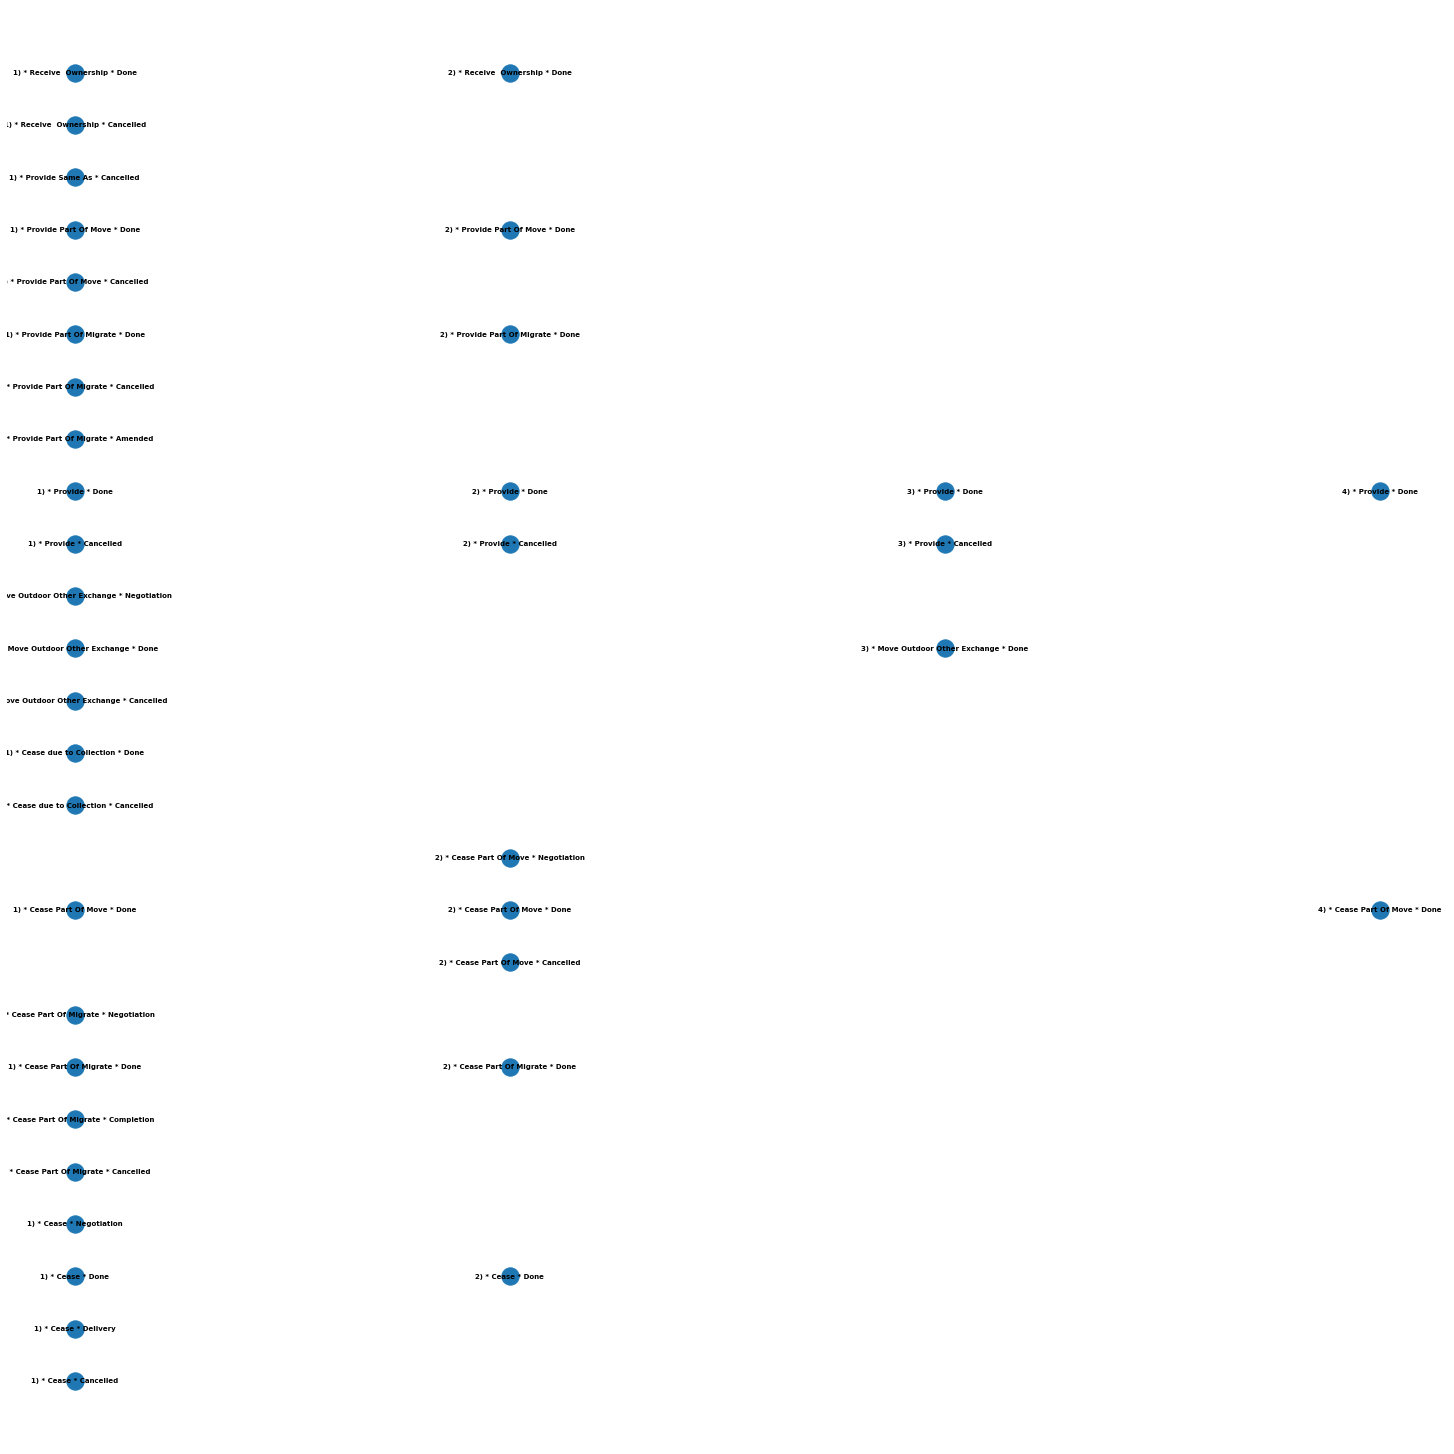

In [98]:
# Draw the resulting graph
pos = nx.get_node_attributes(J,'posi')
nx.draw(J, pos ,with_labels=True, font_weight='bold', font_size = 7)
plt.show()

In [99]:
# clear edges
J.remove_edges_from(list(J.edges()))

In [100]:
#create edges with data (count, days, ave_days)
# accumulated time for nodes

date_col = orders_df.columns.get_loc('ORDER_CREATION_DATE')
acc_col = orders_df.columns.get_loc('accumulated_time')
kpi = 5*((60*60*24)/time_multiplier)

for c in customers:

    temp_df = orders_df[orders_df[unique_col] == c]
  
    for i in range(len(temp_df)-1):
        #print(i, c)
        if J.has_edge(temp_df.iloc[i, -1], temp_df.iloc[(i+1),-1]) == False:
            #print(temp_df.iloc[i, -1], temp_df.iloc[(i+1),-1])
            #print(temp_df.iloc[i,-4], temp_df.iloc[(i+1),-4])
            J.add_edge(temp_df.iloc[i, -1], temp_df.iloc[(i+1),-1])
            J.edges[temp_df.iloc[i, -1],temp_df.iloc[(i+1),-1]]['count'] = 1
            difference = (temp_df.iloc[(i+1),date_col]-temp_df.iloc[i, date_col])
            J.edges[temp_df.iloc[i, -1],temp_df.iloc[(i+1),-1]]['days'] = round(difference.total_seconds()/(time_multiplier),1)
            J.edges[temp_df.iloc[i, -1],temp_df.iloc[(i+1),-1]]['ave_days'] = round(J.edges[temp_df.iloc[i, -1],temp_df.iloc[(i+1),-1]]['days']/ J.edges[temp_df.iloc[i, -1],temp_df.iloc[(i+1),-1]]['count'],1)
            
            acc_current = J.nodes[temp_df.iloc[(i+1),-1]]['acc_time']
            J.nodes[temp_df.iloc[(i+1),-1]]['acc_time'] = round(acc_current + temp_df.iloc[(i+1),acc_col]/(time_multiplier),1) #acc_col is accumulated_time
            #J.nodes[temp_df.iloc[(i+1),-1]]['node_count'] += 1
            
            
            if J.edges[temp_df.iloc[i, -1],temp_df.iloc[(i+1),-1]]['ave_days'] > kpi:
                J.edges[temp_df.iloc[i, -1],temp_df.iloc[(i+1),-1]]['color'] = 'red'
            else:
                J.edges[temp_df.iloc[i, -1],temp_df.iloc[(i+1),-1]]['color'] = 'green'

        else:
            current_count = J.edges[temp_df.iloc[i, -1],temp_df.iloc[(i+1),-1]]['count']
            J.edges[temp_df.iloc[i, -1],temp_df.iloc[(i+1),-1]]['count'] = current_count + 1

            current_days =  J.edges[temp_df.iloc[i, -1],temp_df.iloc[(i+1),-1]]['days']
            difference = (temp_df.iloc[(i+1),date_col]-temp_df.iloc[i, date_col])
            J.edges[temp_df.iloc[i, -1],temp_df.iloc[(i+1),-1]]['days'] = round(current_days + difference.total_seconds()/(time_multiplier),1)

            J.edges[temp_df.iloc[i, -1],temp_df.iloc[(i+1),-1]]['ave_days'] = round(J.edges[temp_df.iloc[i, -1],temp_df.iloc[(i+1),-1]]['days']/ J.edges[temp_df.iloc[i, -1],temp_df.iloc[(i+1),-1]]['count'],1)
            
            acc_current = J.nodes[temp_df.iloc[(i+1),-1]]['acc_time']
            J.nodes[temp_df.iloc[(i+1),-1]]['acc_time'] = round(acc_current + temp_df.iloc[(i+1),acc_col]/(time_multiplier),1) #acc_col is accumulated_time         
            #J.nodes[temp_df.iloc[(i+1),-1]]['node_count'] += 1
            
            if J.edges[temp_df.iloc[i, -1],temp_df.iloc[(i+1),-1]]['ave_days'] > kpi:
                J.edges[temp_df.iloc[i, -1],temp_df.iloc[(i+1),-1]]['color'] = 'red'
            else:
                J.edges[temp_df.iloc[i, -1],temp_df.iloc[(i+1),-1]]['color'] = 'green'


In [101]:
for j in J.nodes:
    #print(j)
    #print(J.nodes[j]['acc_time'])
    #print(J.nodes[j]['node_count'])
    J.nodes[j]['ave_journey'] = round(J.nodes[j]['acc_time']/J.nodes[j]['node_count'],1)
    

In [102]:
# add edge weight attribute

all_counts = []

#Iterate through the graph edges to gather all the weights
for (node1,node2,data) in J.edges(data=True):
    all_counts.append(data['count']) 

    
total_count = sum(all_counts)
print('Total Counts',total_count)

if total_count > 0:
    max_count = max(all_counts)
    min_count = min(all_counts)
    ave_count = total_count/len(all_counts)
    scale = 10

    print('Total Counts',total_count)
    print('Max Count',max_count)
    print('Min Count', min_count)
    print('Ave Count',ave_count)


    if (max_count-min_count) == 0:
        for (node1,node2,data) in J.edges(data=True):
            J.edges[node1,node2]['weight'] = round(J.edges[node1,node2]['count'],1)

    else:                                                
        for (node1,node2,data) in J.edges(data=True):
            J.edges[node1,node2]['weight'] = round(((J.edges[node1,node2]['count']-min_count)/(max_count-min_count))*scale+1,1)
    

Total Counts 155
Total Counts 155
Max Count 102
Min Count 1
Ave Count 8.61111111111111


In [103]:
J.edges(data=True)

EdgeDataView([('2) * Receive  Ownership * Done', '1) * Receive  Ownership * Cancelled', {'count': 2, 'color': 'red', 'days': 769.3, 'weight': 1.1, 'ave_days': 384.6}), ('4) * Provide * Done', '3) * Provide * Done', {'count': 1, 'color': 'green', 'days': 0.0, 'weight': 1.0, 'ave_days': 0.0}), ('3) * Move Outdoor Other Exchange * Done', '2) * Cease Part Of Move * Cancelled', {'count': 1, 'color': 'red', 'days': 167.9, 'weight': 1.0, 'ave_days': 167.9}), ('3) * Move Outdoor Other Exchange * Done', '4) * Cease Part Of Move * Done', {'count': 1, 'color': 'green', 'days': 0.0, 'weight': 1.0, 'ave_days': 0.0}), ('1) * Provide Part Of Move * Cancelled', '2) * Provide Part Of Move * Done', {'count': 3, 'color': 'red', 'days': 3076.8, 'weight': 1.2, 'ave_days': 1025.6}), ('2) * Cease Part Of Move * Negotiation', '1) * Move Outdoor Other Exchange * Negotiation', {'count': 1, 'color': 'green', 'days': 0.0, 'weight': 1.0, 'ave_days': 0.0}), ('1) * Move Outdoor Other Exchange * Done', '2) * Cease Pa

In [104]:
J.nodes(data = True)

NodeDataView({'1) * Cease * Done': {'posi': (1.7, 3), 'node_count': 615, 'acc_time': 0, 'ave_journey': 0.0}, '1) * Cease due to Collection * Cancelled': {'posi': (1.7, 12), 'node_count': 2, 'acc_time': 0, 'ave_journey': 0.0}, '2) * Receive  Ownership * Done': {'posi': (2.95, 26), 'node_count': 2, 'acc_time': 769.3, 'ave_journey': 384.6}, '1) * Provide Part Of Migrate * Done': {'posi': (1.7, 21), 'node_count': 70, 'acc_time': 0, 'ave_journey': 0.0}, '2) * Cease Part Of Move * Cancelled': {'posi': (2.95, 9), 'node_count': 2, 'acc_time': 0.1, 'ave_journey': 0.0}, '1) * Provide Part Of Move * Cancelled': {'posi': (1.7, 22), 'node_count': 4, 'acc_time': 0, 'ave_journey': 0.0}, '1) * Cease Part Of Migrate * Completion': {'posi': (1.7, 6), 'node_count': 2, 'acc_time': 0, 'ave_journey': 0.0}, '2) * Cease Part Of Move * Negotiation': {'posi': (2.95, 11), 'node_count': 1, 'acc_time': 0.0, 'ave_journey': 0.0}, '1) * Move Outdoor Other Exchange * Done': {'posi': (1.7, 15), 'node_count': 3, 'acc_ti

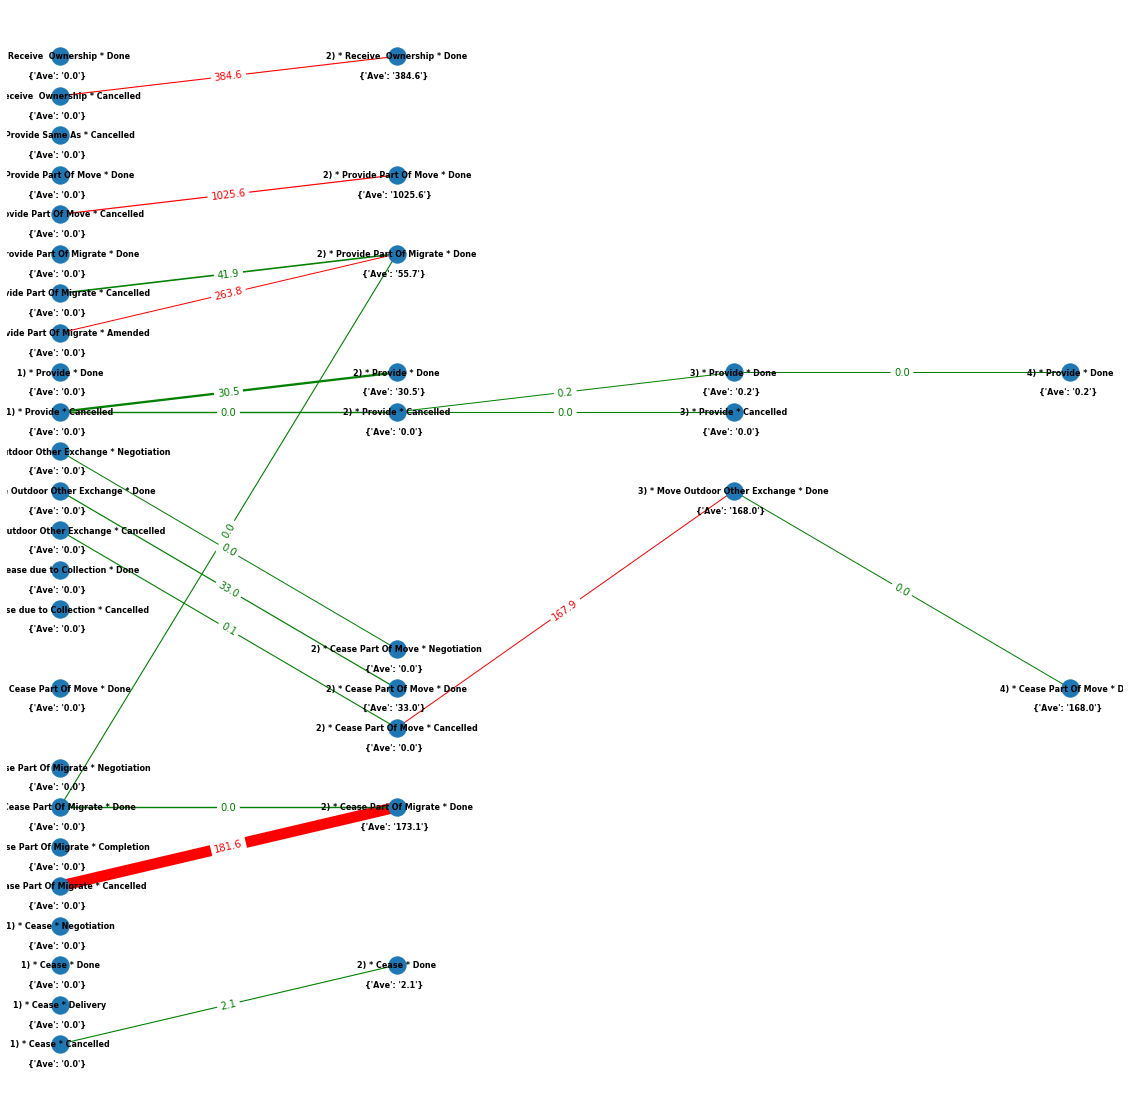

In [105]:
# Draw the resulting graph

#mpl_fig = plt.figure()
mpl_fig, ax = plt.subplots(1,1)

#pos = nx.circular_layout(J)
pos = nx.get_node_attributes(J,'posi')
edges,colors = zip(*nx.get_edge_attributes(J,'color').items())
edges,width = zip(*nx.get_edge_attributes(J,'weight').items())


nx.draw(J,pos, ax=ax, with_labels=True, font_weight='bold', font_size = 8, edgelist=edges, edge_color=colors, width = width
       )

edge_labels  = nx.get_edge_attributes(J,'ave_days')
#label_color  = nx.get_edge_attributes(J,'color').values()

#print(pos)

for e in J.edges(data=True):
    #print(e)
    #print(e[0])
    #print(e[1])
    #print(e[2])
    #print(e[2]['color'])
    nx.draw_networkx_edge_labels(J,ax=ax, pos=pos,edge_labels={(e[0],e[1]):e[2]['ave_days']}, font_color = e[2]['color'])
    

pos_attrs = {}
for node, coords in pos.items():
    pos_attrs[node] = (coords[0] - 0.01, coords[1] - 0.5)

node_attrs = nx.get_node_attributes(J, 'ave_journey')
custom_node_attrs = {}
for node, attr in node_attrs.items():
    custom_node_attrs[node] = "{'Ave': '" + str(attr) + "'}"

nx.draw_networkx_labels(J, pos_attrs, labels=custom_node_attrs, font_weight='bold', font_size = 8)

plt.savefig('stage_transition_edge_colour')
plt.show()

## Create plotly go figure

In [106]:
#Create Edges
def make_edge(x, y, width, color):
    """
    Args:
        x: a tuple of the x from and to, in the form: tuple([x0, x1, None])
        y: a tuple of the y from and to, in the form: tuple([y0, y1, None])
        width: The width of the line

    Returns:
        a Scatter plot which represents a line between the two points given. 
    """
    return  go.Scatter(
                x=x,
                y=y,
                text = hover_txt,
                line=dict(width=width,color=color),
                hoverinfo=None,
                mode='lines')

In [107]:
#Create Edges hover text
def edge_hover(x, y, hover_txt, color):
    """
    Args:
        x: a tuple of the x from and to, in the form: tuple([x0, x1, None])
        y: a tuple of the y from and to, in the form: tuple([y0, y1, None])
        width: The width of the line

    Returns:
        a Scatter plot which represents a line between the two points given. 
    """
    return  go.Scatter(
                x=x,
                y=y,
                text = hover_txt,
                mode='markers',
                hoverinfo='text',
                hoverlabel = dict(
                            bgcolor = color,
                            font =  dict(color = 'white')
                            ),
                marker=go.Marker(opacity=0.1, symbol = 'triangle-left')
                )

In [108]:
data_trace = []

In [109]:
p_0=5
p_1=4

In [110]:
for edge in J.edges(data=True):
    x0, y0 = J.nodes[edge[0]]['posi']
    x1, y1 = J.nodes[edge[1]]['posi']
    
    x=tuple([x0, x1, None])
    y=tuple([y0, y1, None])
    
    xh = tuple([(x0/(p_0+p_1)*p_0+x1/(p_0+p_1)*p_1),None])
    yh = tuple([(y0/(p_0+p_1)*p_0+y1/(p_0+p_1)*p_1),None])
    
    #print(edge)
    
    width = edge[2]['weight']
    color = edge[2]['color']
    hover_txt = 'Count: '+ str(round(edge[2]['count'],1)) + '<br />Ave '+time_measure+': ' + str(round(edge[2]['days']/edge[2]['count'],1))
    
    #print(width)
    
    data_trace.append(make_edge(x,y,width,color))
    #if else
    data_trace.append(edge_hover(xh,yh,hover_txt,color))

/usr/local/lib/python3.5/dist-packages/plotly/graph_objs/_deprecations.py:441: DeprecationWarning:

plotly.graph_objs.Marker is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Marker
  - plotly.graph_objs.histogram.selected.Marker
  - etc.




In [111]:
#data_trace

In [112]:
node_trace = go.Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='Blackbody',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line=dict(width=2)))

for node in J.nodes():
    x, y = J.nodes[node]['posi']
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])

In [113]:
for node in J.nodes(data=True):
    #print(node)
    node_trace['marker']['color']+=tuple([node[1]['node_count']])
    node_info = node[0]+ '<br />Journeys: ' +str(node[1]['node_count']) + '<br />Ave journey '+ time_measure + ': ' +str(round(node[1]['acc_time']/node[1]['node_count'],1))
    node_trace['text']+=tuple([node_info])

In [114]:
data_trace.append(node_trace)

In [115]:
label_size = max(round(16-(len(type_status)/6),0),4)

In [116]:
label_trace = go.Scatter(
    x=[],
    y=[],
    text=[],
    mode='text',
    hoverinfo='none',
    opacity=0.8,
    textposition='middle right',
    textfont=dict( size = label_size,
                  color='#888'
                 )
    )

for label in L.nodes():
    x, y = L.nodes[label]['posi']
    #print(L.nodes[label]['posi'])
    label_trace['x'] += tuple([x])
    label_trace['y'] += tuple([y])
    label_trace['text']+= tuple([label])


In [117]:
data_trace.append(label_trace)

In [118]:
fig = go.Figure(data=data_trace,
             layout=go.Layout(
                title='Order-Prime resource ',
                titlefont=dict(size=16),
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="Python code: <a href='https://plot.ly/ipython-notebooks/network-graphs/'> https://plot.ly/ipython-notebooks/network-graphs/</a>",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))

In [119]:
ply.offline.plot(fig, filename='Order_stages_with_filters_applied.html')

'Order_stages_with_filters_applied.html'

In [120]:
app = dash.Dash()

In [121]:
app.layout = html.Div([
    html.Div([html.H1("Networkx Stage Graph")], className="row", style={'textAlign': "center"}),
    html.Div([dcc.Graph(id="my-graph", figure = fig)]),
], className="container")

In [122]:
if __name__ == '__main__':
    app.run_server(debug=True)

Running on http://127.0.0.1:8050/
Debugger PIN: 137-991-926
 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


SystemExit: 1

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:3334: UserWarning:

To exit: use 'exit', 'quit', or Ctrl-D.

